In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
from visualize import *
from util import *


from color_correction import *
from tone_adjustment import *

from color_transfer import *
from color_transfer_reinhart import *

import matplotlib.pyplot as plt

from histogram_matching import *
from lut_generation import *


In [3]:
# load images
img_ref_bgr = cv2.imread("img/seven-ref.jpg")
img_src_bgr = cv2.imread("img/our_data/still_DSCF4133_balanced.jpg")

img_src_sam2 = cv2.imread("img/children-of-men-mask-src.png")
img_ref_sam2 = cv2.imread("img/children-of-men-mask-ref.png")

In [4]:
# convert to RGB
img_ref_rgb = cv2.cvtColor(img_ref_bgr, cv2.COLOR_BGR2RGB)
img_src_rgb = cv2.cvtColor(img_src_bgr, cv2.COLOR_BGR2RGB)

L_in range: 2.0 - 218.0
L_ref range: 0.0 - 252.0
L_in mean: 113.41
L_ref mean: 70.45
Unique CDF values: 251 / 256
transfer_function range: 0 - 255
L_matched range: 0.0 - 252.0
L_matched mean: 70.08
Skipping Midtones (too few pixels: 0)

Processing Shadows (5936481 pixels):
  Chroma scale: 1.894
  Chroma mean: 184.59
  Preserving original hue

Processing Highlights (1515615 pixels):
  Chroma scale: 1.900
  Chroma mean: 188.04
  Preserving original hue

Applying edge-aware smoothing...


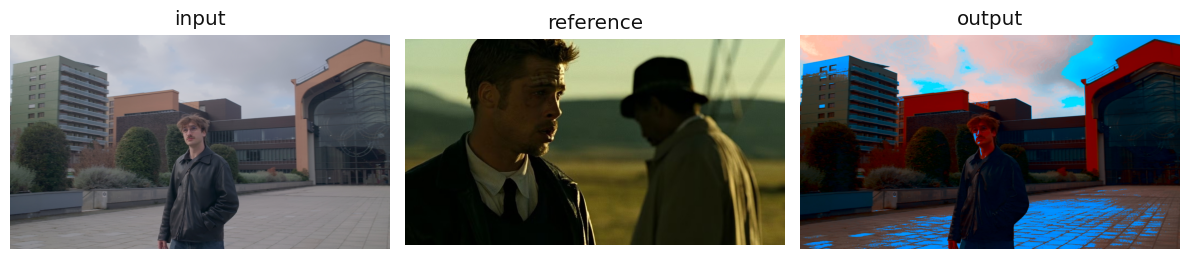

In [5]:
# out_img = adobe_color_transfer(img_src_rgb, img_ref_rgb, smooth_luminance_transfer=0.01, overlap_split_tone=0.1, color_space="LAB", draw_transfer=True)
out_img = color_transfer(img_src_rgb, img_ref_rgb, method="Adobe")
plot_before_after(img_ref_rgb, img_src_rgb, out_img)


In [ ]:
# generate LUT
generate_lut_RBF(img_src_rgb, out_img, path="lut/ll_out_jules_seven_TEST.cube")

/Users/jgoueslard/Home/dev/msct/IA_CV/pickment/visualize.py:252: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(theta, r, c=img_rgb,


<PolarAxes: >

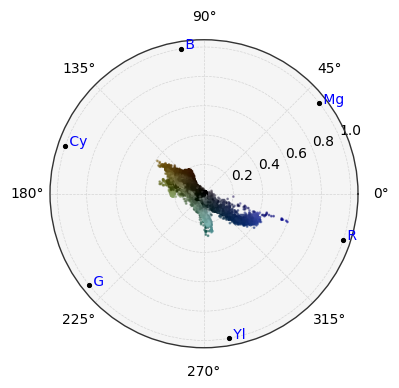

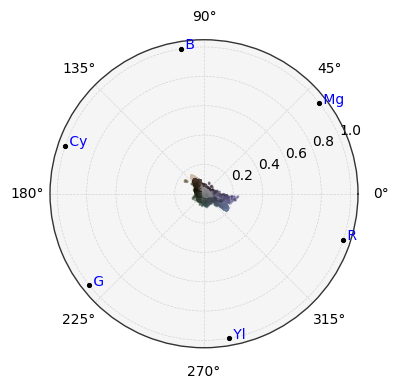

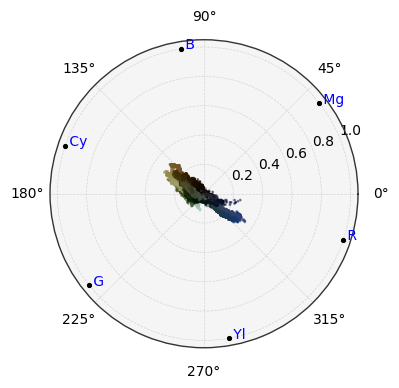

In [12]:
# plot vectorscope
# ref
plot_vectorscope(img_ref_rgb)

# src
plot_vectorscope(img_src_rgb)

# output
plot_vectorscope(out_img)

In [63]:
skin_mask_src = generate_skin_mask(img_src_rgb)
skin_mask_ref = generate_skin_mask(img_ref_rgb)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


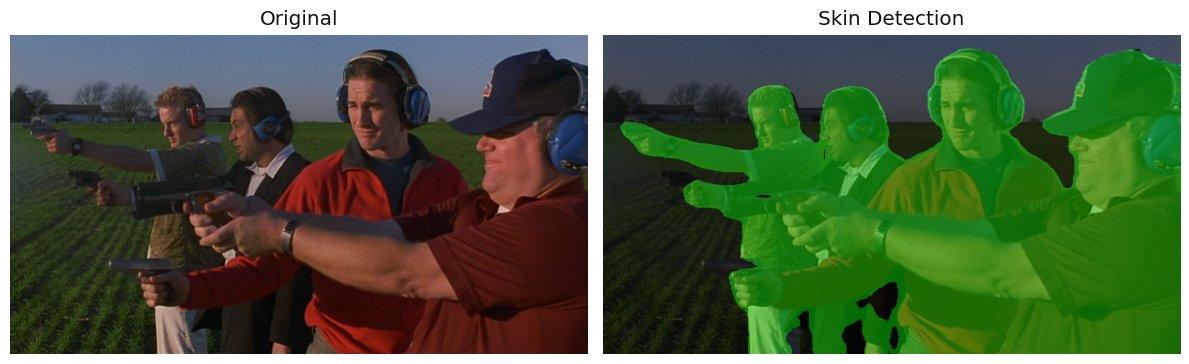

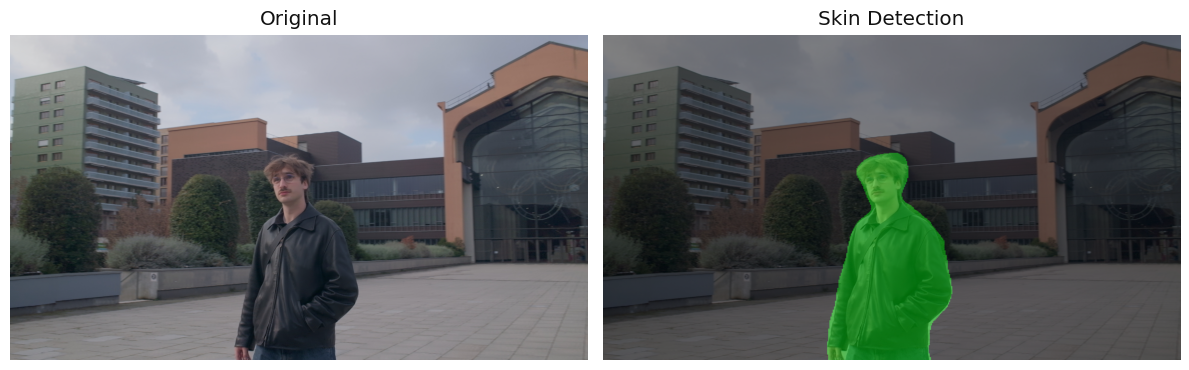

In [64]:
display_mask_comparison(img_ref_rgb, skin_mask_ref)
display_mask_comparison(img_src_rgb, skin_mask_src)

In [65]:
skin_mask = [skin_mask_src, skin_mask_ref]
out_img_skin_corrected = color_transfer(img_src_rgb, img_ref_rgb, method="Blend", skin_mask=skin_mask, strength=1.0)

L_in range: 2 - 218
L_ref range: 0 - 221
L_in mean: 113.41
L_ref mean: 62.11
transfer_function_in range: 0.0 - 0.9999999403953552
transfer_function_ref range: 8.439429279860633e-07 - 1.0000001192092896
transfer_function_in_inv range: 0.0 - 217.75
full_transfer_function range: 0 - 217
L_matched range: 0 - 203
L_matched mean: 61.71


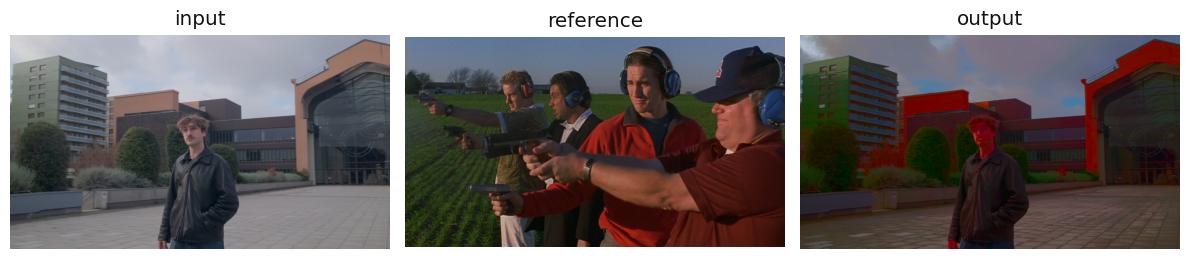

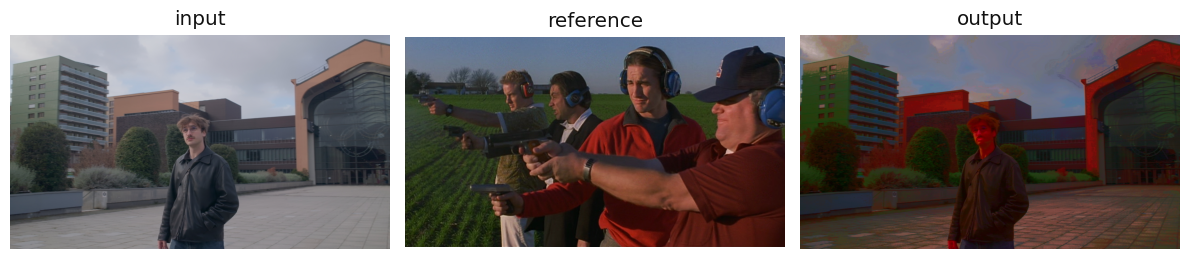

In [66]:
plot_before_after(img_ref_rgb, img_src_rgb, out_img)

plot_before_after(img_ref_rgb, img_src_rgb, out_img_skin_corrected)

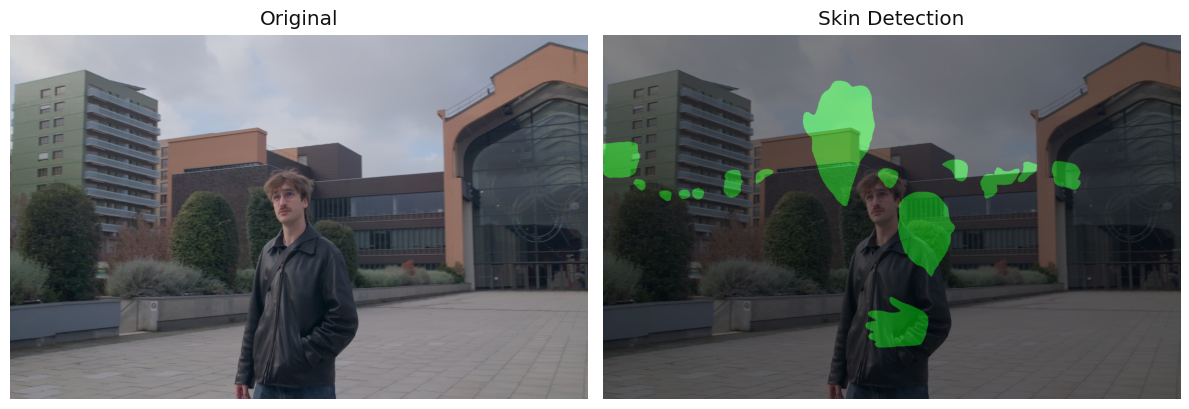

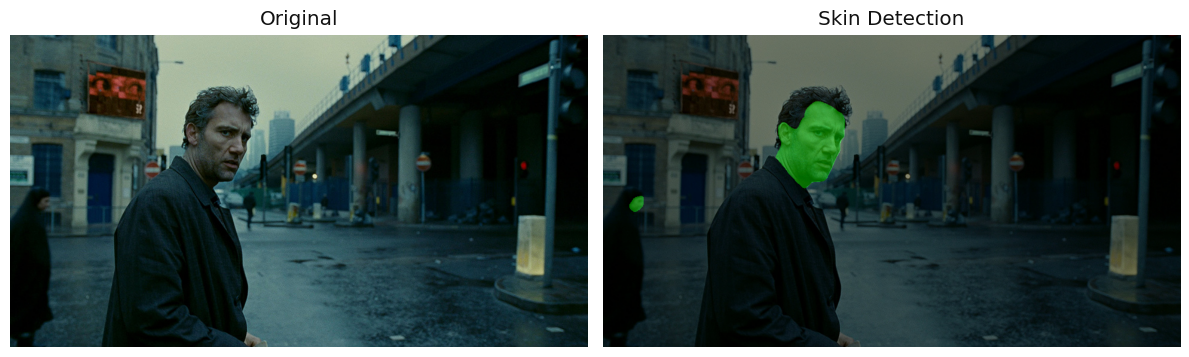

L_in range: 5 - 217
L_ref range: 0 - 241
L_in mean: 113.30
L_ref mean: 60.00
transfer_function_in range: 0.0 - 1.0000001192092896
transfer_function_ref range: 0.004634125158190727 - 0.9999995827674866
transfer_function_in_inv range: 0.0 - 255.0
full_transfer_function range: 0 - 255
L_matched range: 0 - 229
L_matched mean: 59.80


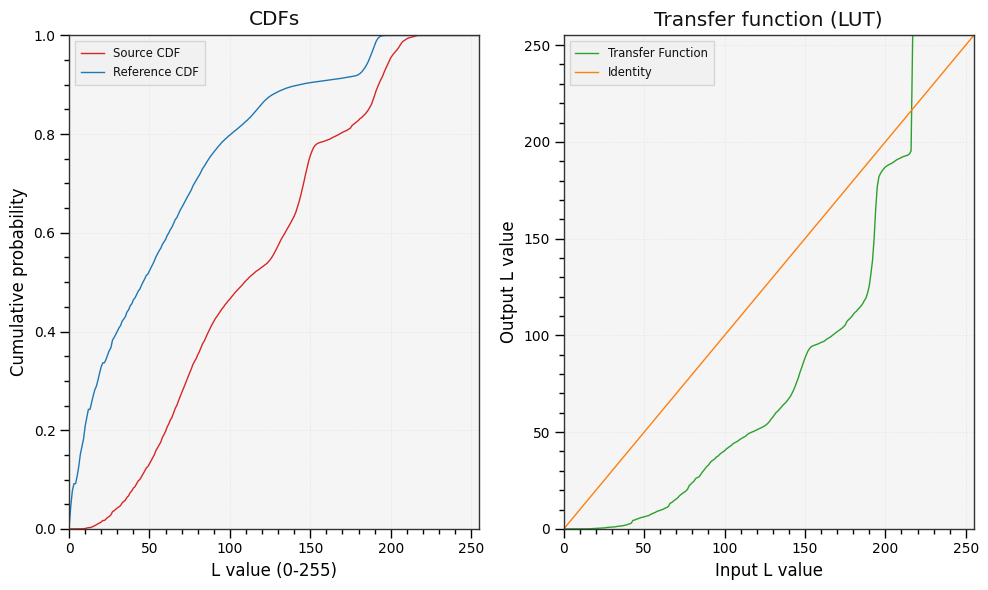

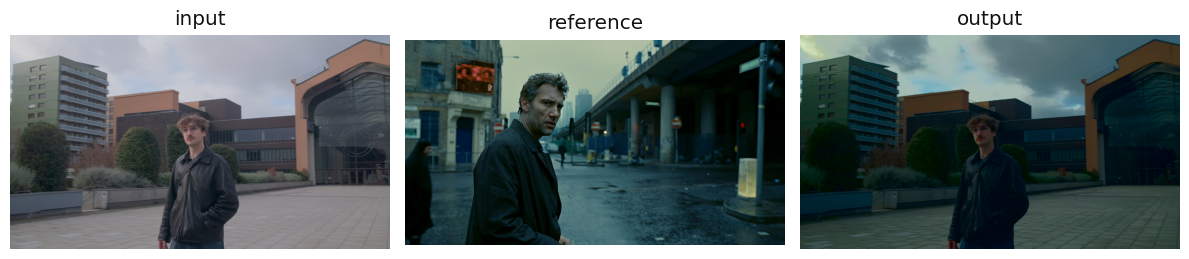

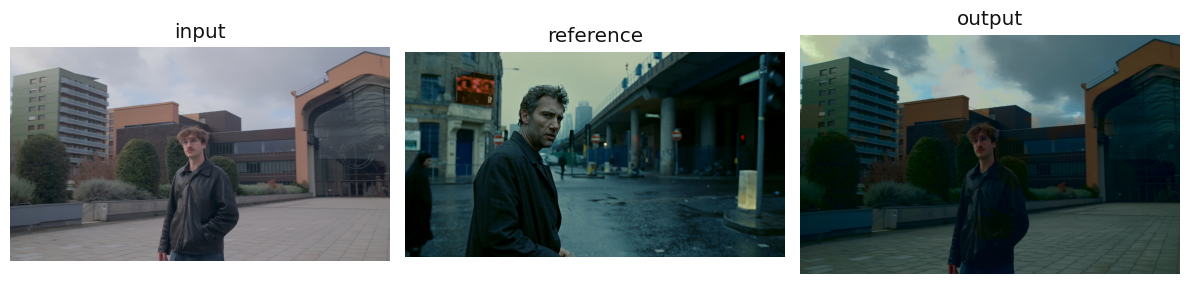

In [ ]:
############### SAM2 EXPERIMENTATIONS ###############
# load masks generated from SAMv2

skin_mask_src_sam2 = load_sam2_mask(img_src_sam2)
skin_mask_ref_sam2 = load_sam2_mask(img_ref_sam2)

# resize input image to match SAM2 inference output !
src_sam2_h, src_sam2_w = skin_mask_src_sam2.shape[:2]
img_src_rgb_for_sam2 = cv2.resize(img_src_rgb, (src_sam2_w, src_sam2_h), interpolation=cv2.INTER_LINEAR)

ref_sam2_h, ref_sam2_w = skin_mask_ref_sam2.shape[:2]
img_ref_rgb_for_sam2 = cv2.resize(img_ref_rgb, (ref_sam2_w, ref_sam2_h), interpolation=cv2.INTER_LINEAR)

display_mask_comparison(img_src_rgb_for_sam2, skin_mask_src_sam2)
display_mask_comparison(img_ref_rgb_for_sam2, skin_mask_ref_sam2)

skin_mask_sam2 = [skin_mask_src_sam2, skin_mask_ref_sam2]
out_img_skin_corrected_sam2 = color_transfer(img_src_rgb_for_sam2, img_ref_rgb_for_sam2, method="Adobe", skin_mask=skin_mask_sam2, strength=1.0)

plot_before_after(img_ref_rgb, img_src_rgb, out_img)

plot_before_after(img_ref_rgb, img_src_rgb, out_img_skin_corrected_sam2)
